In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Change: Used exponential operator (**) ###
def f(w,x,y,z):
	return w**3+x**2-y**2-z**2+2*y*z-3*w*x+w*z-x*y+2

### Change: Joined the separated character list to one string, then converted it to int ###
def bin_to_dec(list):
	return int("".join(list),2)

def evaluation(solution):
	w=bin_to_dec(solution[0:4])
	x=bin_to_dec(solution[4:8])
	y=bin_to_dec(solution[8:12])
	z=bin_to_dec(solution[12:16])
	return f(w,x,y,z)

### Change: Used if else with list comprehension ###
def generate_popn(n):
	population=[]
	for i in range(n):
		solution=[]
		w=['1' if random.random() < 0.5 else '0' for __ in range(4) ]
		x=['1' if random.random() < 0.5 else '0' for __ in range(4) ]
		y=['1' if random.random() < 0.5 else '0' for __ in range(4) ]
		z=['1' if random.random() < 0.5 else '0' for __ in range(4) ]

		solution = w+x+y+z
		population.append(solution)
	return population

def averaging(added,fitness):
	increased = [x+added for x in fitness]
	average = sum(increased)/len(increased)
	averaging = [x/average for x in increased]
	return averaging

# def substring_swap(solution1,solution2):
# 	dimension=len(solution1)
# 	index1 = random.randint(0, dimension-1)
# 	index2 = random.randint(0, dimension-1)
# 	while index1 == index2:
# 		index2 = random.randint(0,dimension-1)

# 	if index1 < index2:
# 		left = index1
# 		right = index2
	
# 	else:
# 		left = index2
# 		right = index1

# 	baby1 = solution1[0:left]+solution2[left:right+1]+solution1[right+1:]
# 	baby2 = solution2[0:left]+solution1[left:right+1]+solution2[right+1:]
# 	return baby1,baby2

# Remove the comments for this section if you want to test the code for GA for SINGLE POINT CROSSOVER
def substring_swap(solution1,solution2):
	index = random.randint(0,len(solution1) - 1)

	baby1 = solution1[0:index]+solution2[index:]
	baby2 = solution2[0:index]+solution1[index:]
	return baby1,baby2

### Change: Insert len() to randint and used shorthand if-else ###
def mutation(solution):
	index1 = random.randint(0,len(solution)-1)
	solution[index1] = '0' if solution[index1] == 1 else '1'
	return solution

### Change: Seprate index and value into separate variables using enumerate() ###
def generate_wheel(percentages):
	wheel=[]
	pair=[]
	start=0.0
	end=percentages[0]
	pair.append(start)
	pair.append(end)
	wheel.append(pair)
	for i,val in enumerate(percentages):
		pair=[]
		if i != 0:
			start = end
			end = start + val
			pair.append(start)
			pair.append(end)
			wheel.append(pair)
	return wheel

### Change: Insert len() directly to range and used Comparison comprehension ###
def select_parent(random_number,wheel):
	for i in range(len(wheel)):
		if wheel[i][0] < random_number < wheel[i][1]: return i+1
		else: continue

The solutions:
['1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0']
['1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0']
['0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1']
['1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0']
['1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0']
['1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0']
['0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0']
['1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1']
['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1']
['0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0']
['1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0']
['0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0']
['0', '1', '0

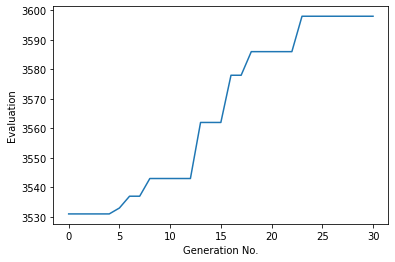

In [6]:
n = 100 # num of solutions in the popn
added = 2000 #arbitrary number added to fitness/eval
mutation_rate = 0.25 # rate of mutation
generations = 30 # num of generations/loop

### Major Changes: Minimized output using print shortcuts and list comprehension ###

###### Generate Population ######
popn=generate_popn(n)
print("The solutions:")
print(*popn, sep="\n")

###### Calculate Fitness ######
fitness_value=[evaluation(i) for i in popn]
print(f"\n\nThe Evaluation:\n{fitness_value}")

###### Keep Track of Best ######
all_fitness=[]
index_best = np.argmax(fitness_value)
super_best_solution = popn[index_best]
super_best_fitness = max(fitness_value) # a vector of 16bit string
print(f"\n\nBest Solution : {super_best_solution}") # a scalar value
print(f"Best fitness: {super_best_fitness}")
all_fitness.append(super_best_fitness) # keep track of bests so far

###### Generations/Loop ######
for j in range(generations):
	print(f"\n\nGeneration : {j}")

	###### Calculate the strength of each solution ######
	ave = averaging(added,fitness_value)

	# Convert the averaging into percentages 
	percentages=[x/sum(ave) for x in ave]
	print(f"\n\nThe Strength\n{percentages}")

	###### Generate the roulette wheel ranges ######
	wheel=generate_wheel(percentages)
	print(f"\n\nThe Wheel\n{wheel}")

	###### Recombination ######
	new_popn=[]
	for i in range(n//2): # we do recombination for half the number
		#every recombination will generate two offsprings

		###### Select Parents ######
		parent1 = select_parent(random.random(),wheel)
		parent2 = select_parent(random.random(),wheel)

		print(f"\nParents {parent1} and {parent2}")

		print(f"\nRecombination : {i}")
		print("Before Swapping")
		print(f"Parent1 {popn[parent1-1]}")
		print(f"Parent2 {popn[parent2-1]}")
		print(f"Fitness Parent 1: {evaluation(popn[parent1-1])}")
		print(f"Fitness Parent 2: {evaluation(popn[parent2-1])}")
		babe1, babe2 = substring_swap(popn[parent1-1],popn[parent2-1])
		print("After Swapping")
		print(f"Baby 1 {babe1}")
		print(f"Baby 2 {babe2}")
		print(f"Fitness Baby 1 : {evaluation(babe1)}")
		print(f"Fitness Baby 2 : {evaluation(babe2)}")
		new_popn.extend([babe1,babe2])

	print("The New Solutions:")
	print(*new_popn, sep="\n")


	###### Calculate Fitness ######
	fitness_value=[evaluation(i) for i in new_popn]
	print(f"\nThe Evaluation\n{fitness_value}")

	###### Mutation ######
	for i in range(n):
		if random.random() < mutation_rate:
			new_popn[i] = mutation(new_popn[i])
		# unmutated solutions are not replaced
	
	###### New population becomes the current population ######
	popn=new_popn

	print("The Mutated Solutions")
	print(*new_popn, sep="\n")

	###### Calculate Fitness ######
	fitness_value=[evaluation(i) for i in new_popn]
	print(f"\nThe Evaluation\n{fitness_value}")

	###### Determine best in this generation ######
	index_best = np.argmax(fitness_value)
	best_solution_this_gen = new_popn[index_best]
	best_fitness_this_gen = max(fitness_value)

	###### Compare with overall best ######
	if best_fitness_this_gen > super_best_fitness: # maximization
		super_best_fitness = best_fitness_this_gen # scalar
		super_best_solution = best_solution_this_gen # vector of 16 bit string
	
	print(f"\nBest Solution : {super_best_solution}")
	print(f"Best Fitness : {super_best_fitness}")

	all_fitness.append(super_best_fitness)

print(f"\nPrinting all fitness values:\n{all_fitness}")

plt.plot(all_fitness)
plt.ylabel("Evaluation")
plt.xlabel("Generation No.")
plt.show()